<a href="https://colab.research.google.com/github/ohazem1/Data-Science-Projects/blob/main/CIB_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Info

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in EGP (includes individual and family/supplementary
credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=**unknown**,
6=**unknown**)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years

Payment Data
7. PAY_0: Repayment status in September, 2018 (-1=pay duly, 1=payment delay for one
month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment
delay for nine months and above)
8. PAY_2: Repayment status in August, 2018 (scale same as above)
9. PAY_3: Repayment status in July, 2018 (scale same as above)
10. PAY_4: Repayment status in June, 2018 (scale same as above)
11. PAY_5: Repayment status in May, 2018 (scale same as above)
12. PAY_6: Repayment status in April, 2018 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2018 (EGP)
14. BILL_AMT2: Amount of bill statement in August, 2018 (EGP)
15. BILL_AMT3: Amount of bill statement in July, 2018 (EGP)
16. BILL_AMT4: Amount of bill statement in June, 2018 (EGP)
17. BILL_AMT5: Amount of bill statement in May, 2018 (EGP)
18. BILL_AMT6: Amount of bill statement in April, 2018 (EGP)
19. PAY_AMT1: Amount of previous payment in September, 2018 (EGP)
20. PAY_AMT2: Amount of previous payment in August, 2018 (EGP)
21. PAY_AMT3: Amount of previous payment in July, 2018 (EGP)
22. PAY_AMT4: Amount of previous payment in June, 2018 (EGP)
23. PAY_AMT5: Amount of previous payment in May, 2018 (EGP)
24. PAY_AMT6: Amount of previous payment in April, 2018 (EGP)

This note book mainly aims to predict the default payement "**default.payment.next.month: Default payment (1=yes, 0=no)**". Thus Default is the Target Variable (Dependent Variable)

# Importing


In [1]:
# importing pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the TSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/CCs_Challenge.csv')


df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Understanding

In [4]:
df.tail(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29990,29991,140000.0,1,2,1,41,0,0,0,0,...,138262.0,49675.0,46121.0,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0,0
29991,29992,210000.0,1,2,1,34,3,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29992,29993,10000.0,1,3,1,43,0,0,0,-2,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,29994,100000.0,1,1,2,38,0,-1,-1,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29994,29995,80000.0,1,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
# Investigation of the columns datatypes to check for any wrong datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.shape

(30000, 25)

In [7]:
# Statistical Description

df.describe()

# The dataset containst 30k customer, Average age is 35,
# The average credit limit is 167484 while the max limit is 1000000 and the min limit is 10000
# 0.221200 (22%) will defualt

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# checking for null values
df.isnull().sum()

# No null values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
# checking for duplicates
df.duplicated().sum()

# No Duplicates

0

In [10]:
# trying to view the unique categories in each column for better understanding

for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")


# 1) 'Education' & 'Marriage' has an unknown variable 0
# 2) 'Education' 5 & 6 unknown
# 3) 'PAY' has an unknown variable -2,0
# 4) 'PAY' -1 = paid appropriately | 1 = one month delay | 2 = two month delay etc.


ID : [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL : [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX : [2 1]
EDUCATION : [2 1 3 5 4 6 0]
MARRIAGE : [1 2 3 0]
AGE : [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21

In [11]:
# counting sus variables {0,5,6}
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [12]:
# counting sus variables {0}
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
# counting sus variables {-2,0}
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

# Data Cleaning & Preprocessing

In [14]:
# renaming the target variable to DEFAULT
df.rename(columns={"default.payment.next.month": "DEFAULT"}, inplace=True)

# renaming PAY_N to start with PAY_1
df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)


In [15]:
# Replace 0 values in 'MARRIAGE' with NaN
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = np.nan

# Drop rows with NaN values
df = df.dropna()

df['MARRIAGE'] = df['MARRIAGE'].astype(int)
df['MARRIAGE'].value_counts()


<ipython-input-15-946a759137bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MARRIAGE'] = df['MARRIAGE'].astype(int)


2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64

In [16]:
df.loc[df['EDUCATION'] == 5, 'EDUCATION'] = np.nan
df.loc[df['EDUCATION'] == 6, 'EDUCATION'] = np.nan
df.loc[df['EDUCATION'] == 0, 'EDUCATION'] = np.nan

df = df.dropna()

df['EDUCATION'] = df['EDUCATION'].astype(int)
df['EDUCATION'].value_counts()


2    14024
1    10581
3     4873
4      123
Name: EDUCATION, dtype: int64

In [17]:
# List of columns
columns_to_replace = ['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']

# Replace -1 or -2 with 0 in the specified columns
for column in columns_to_replace:
    df[column] = df[column].replace([-1, -2], 0)

print(df['PAY_1'].unique())

[2 0 1 3 4 8 7 5 6]


# EDA

In [18]:
# calculating the correlation
corr = df.corr()
corr

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,1.000000,0.025834,0.019949,0.030059,-0.027800,0.017757,-0.020732,-0.009254,-0.018282,0.014619,...,0.039223,0.015707,0.016421,0.010050,0.008101,0.039653,0.008485,0.000377,0.004173,-0.013499
LIMIT_BAL,0.025834,1.000000,0.024817,-0.244039,-0.109756,0.144214,-0.171197,-0.197925,-0.192116,-0.181156,...,0.293442,0.295316,0.289701,0.195666,0.177669,0.210523,0.203263,0.217251,0.219676,-0.154357
SEX,0.019949,0.024817,1.000000,0.012016,-0.030073,-0.091439,-0.033549,-0.044524,-0.041620,-0.040017,...,-0.022611,-0.017774,-0.017685,0.000381,-0.001413,-0.008779,-0.001966,-0.001823,-0.001971,-0.039815
EDUCATION,0.030059,-0.244039,0.012016,1.000000,-0.147977,0.187425,0.065451,0.075949,0.066588,0.063582,...,-0.014428,-0.018165,-0.015190,-0.045972,-0.038628,-0.051966,-0.043094,-0.049469,-0.053670,0.049087
MARRIAGE,-0.027800,-0.109756,-0.030073,-0.147977,1.000000,-0.418284,-0.013416,-0.010938,0.000906,-0.004018,...,-0.023902,-0.026148,-0.022198,-0.005120,-0.008058,-0.002921,-0.013957,-0.002882,-0.006024,-0.026903
AGE,0.017757,0.144214,-0.091439,0.187425,-0.418284,1.000000,-0.000888,-0.007980,-0.013557,-0.006906,...,0.049839,0.048323,0.046712,0.025440,0.022402,0.029478,0.021567,0.021511,0.019139,0.014424
PAY_1,-0.020732,-0.171197,-0.033549,0.065451,-0.013416,-0.000888,1.000000,0.698578,0.517586,0.460937,...,0.022131,0.030677,0.030576,-0.079913,-0.056962,-0.062728,-0.062167,-0.054299,-0.049347,0.398048
PAY_2,-0.009254,-0.197925,-0.044524,0.075949,-0.010938,-0.007980,0.698578,1.000000,0.663714,0.512788,...,0.033078,0.040667,0.042037,-0.097551,-0.054522,-0.059808,-0.054511,-0.048929,-0.042602,0.327919
PAY_3,-0.018282,-0.192116,-0.041620,0.066588,0.000906,-0.013557,0.517586,0.663714,1.000000,0.679029,...,0.017667,0.026963,0.029345,-0.039100,-0.073388,-0.057447,-0.053949,-0.051020,-0.048076,0.287002
PAY_4,0.014619,-0.181156,-0.040017,0.063582,-0.004018,-0.006906,0.460937,0.512788,0.679029,1.000000,...,0.015732,0.028055,0.033635,-0.054354,-0.036584,-0.073992,-0.055423,-0.052960,-0.048604,0.268986


In [19]:
#sorting the corelation results descendingly for a better view and understanding
corr['DEFAULT'].sort_values(ascending=False, key=lambda x: x.abs())
#as shown below PAY_N has the strongest correlation degree with default

DEFAULT      1.000000
PAY_1        0.398048
PAY_2        0.327919
PAY_3        0.287002
PAY_4        0.268986
PAY_5        0.261114
PAY_6        0.244659
LIMIT_BAL   -0.154357
PAY_AMT1    -0.073881
PAY_AMT2    -0.058307
PAY_AMT4    -0.057012
PAY_AMT3    -0.056288
PAY_AMT5    -0.056075
PAY_AMT6    -0.053692
EDUCATION    0.049087
SEX         -0.039815
MARRIAGE    -0.026903
BILL_AMT1   -0.019303
AGE          0.014424
BILL_AMT2   -0.013710
ID          -0.013499
BILL_AMT3   -0.013494
BILL_AMT4   -0.009474
BILL_AMT5   -0.006226
BILL_AMT6   -0.005339
Name: DEFAULT, dtype: float64

<Axes: >

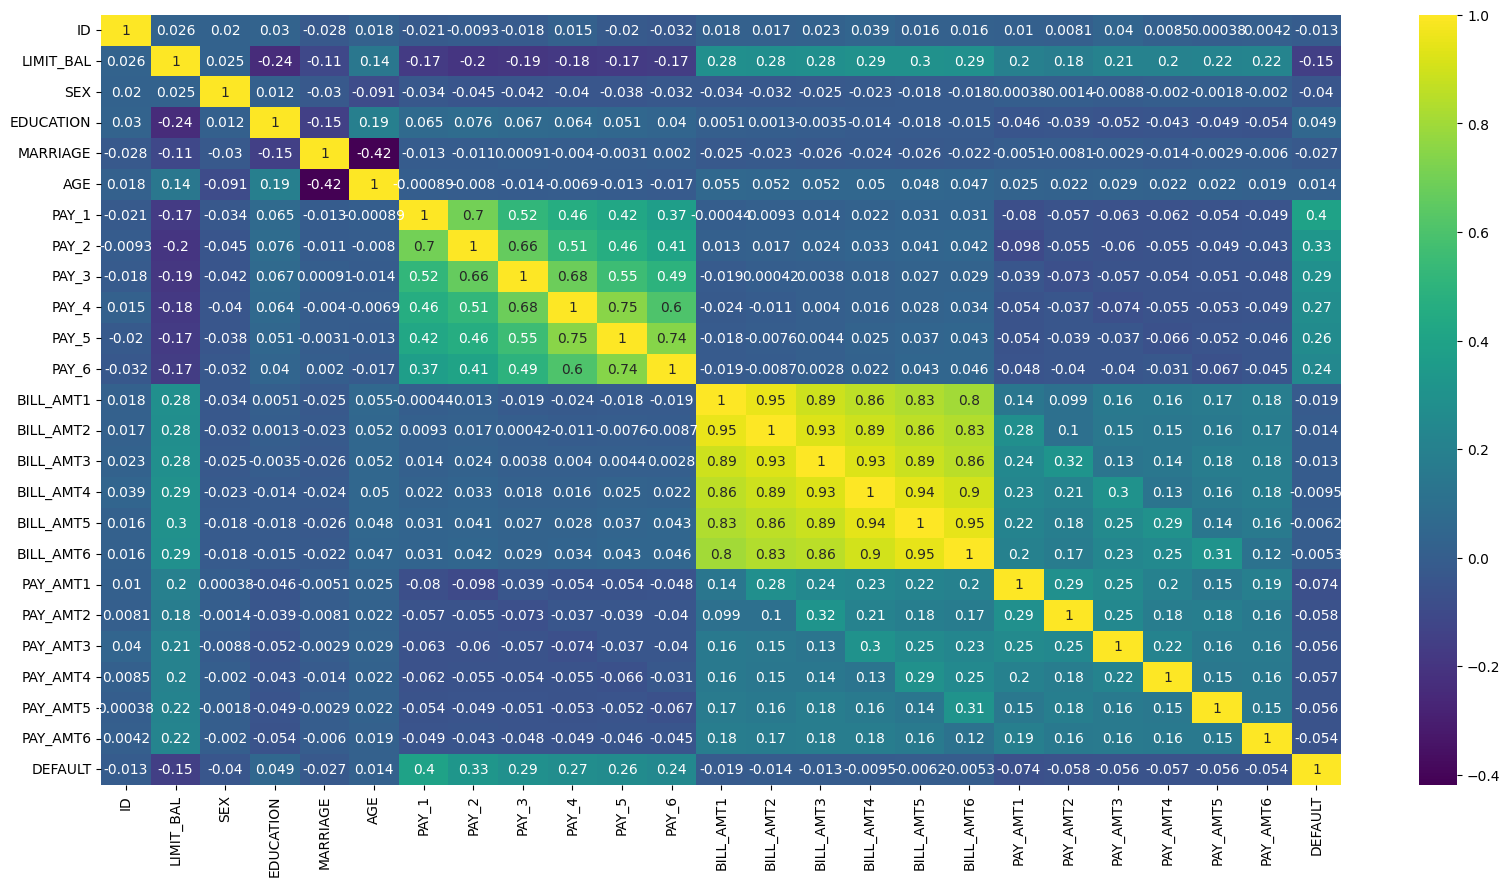

In [20]:
# visualising the correlation using heat map
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='viridis', annot = True)

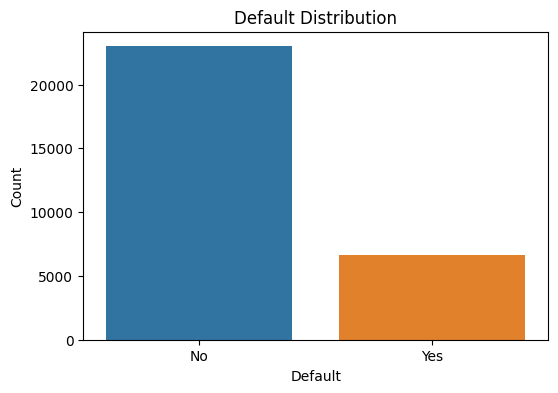

In [21]:
# Default Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='DEFAULT')
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Default Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

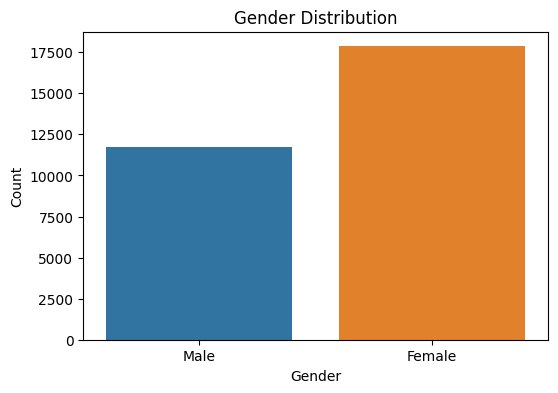

In [22]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SEX')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

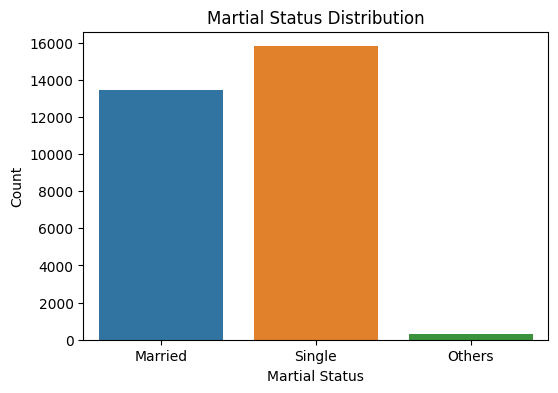

In [23]:
# Martial Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='MARRIAGE')
plt.xlabel('Martial Status')
plt.ylabel('Count')
plt.title('Martial Status Distribution')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'])
plt.show()

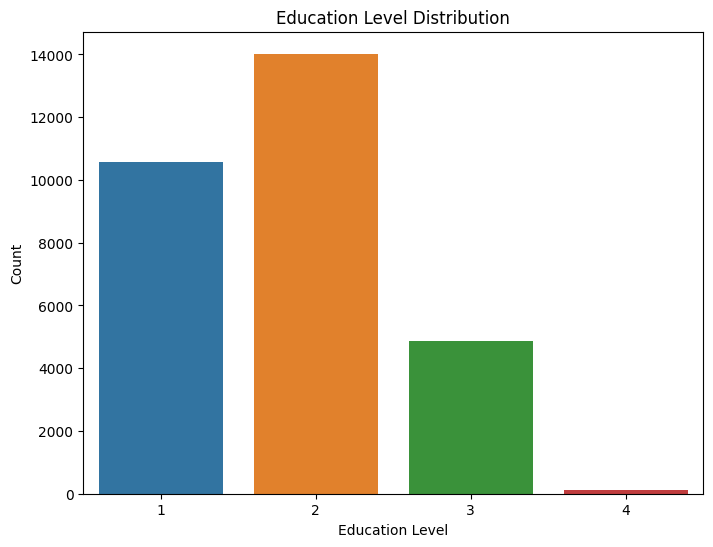

In [24]:
# Education Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EDUCATION')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()

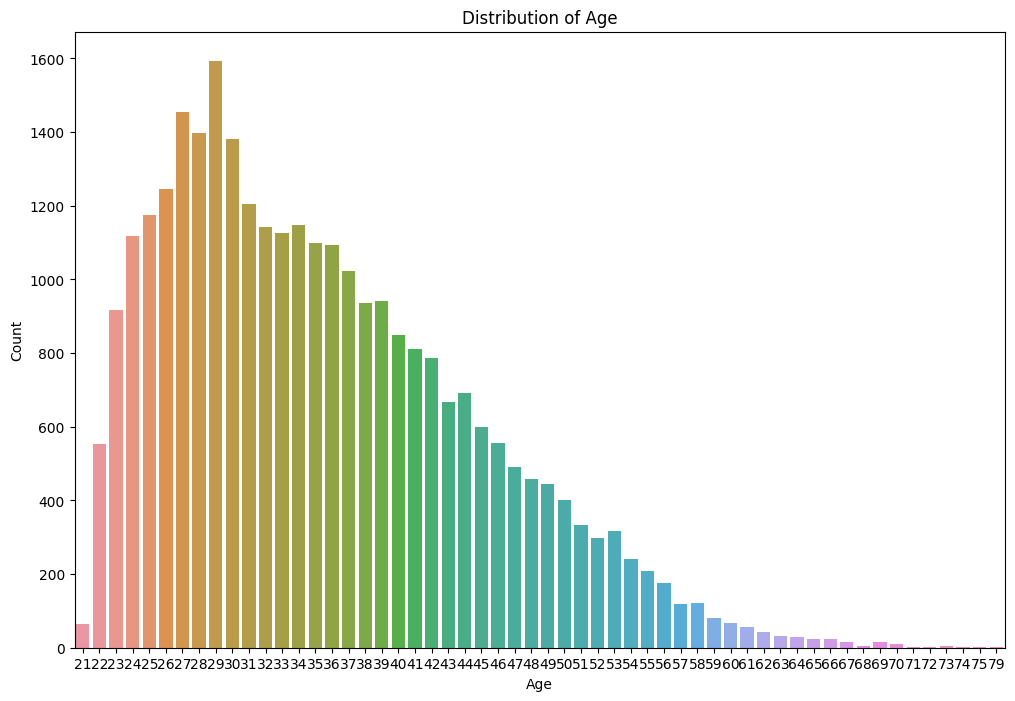

In [25]:
# Age Distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='AGE', data=df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [26]:
# 1 --> MALE, 2 --> FEMALE
df_percent = pd.crosstab(df.SEX,df.DEFAULT, normalize = 'index').rename_axis(None)

# Multiply all percentages by 100 for graphing.
df_percent *= 100

df_percent.head()
# 24% of males will default while 20% of females will default

DEFAULT,0,1
1,75.642772,24.357228
2,79.031084,20.968916


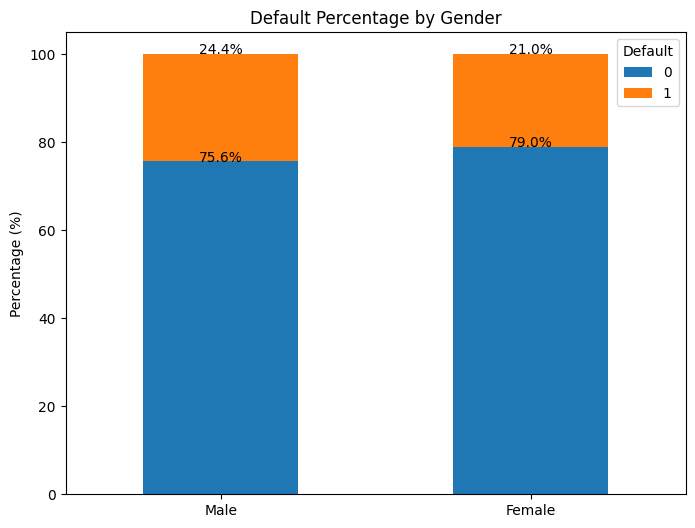

In [27]:
# Plotting the bar chart
ax = df_percent.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Default Percentage by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Default', loc='upper right')

# Data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center')


In [28]:
# 1=married, 2=single, 3=others
df_percent2 = pd.crosstab(df.MARRIAGE,df.DEFAULT, normalize = 'index').rename_axis(None)

# Multiply all percentages by 100 for graphing.
df_percent2 *= 100

df_percent2.head()
# 23% of Married will default while 21% of Singles will default however others comes with the highest category with a percantage of 26%

DEFAULT,0,1
1,76.315204,23.684796
2,78.938378,21.061622
3,73.584906,26.415094


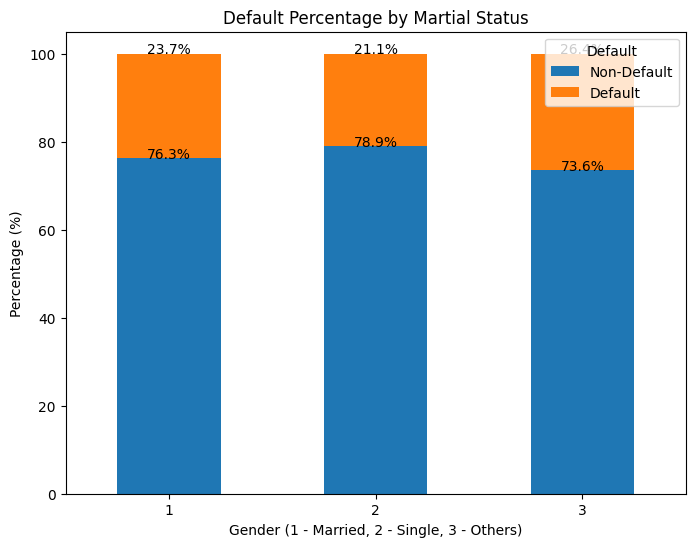

In [29]:
# Rename columns for clarity
df_percent2.columns = ['Non-Default', 'Default']

# Plotting the bar chart
ax = df_percent2.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Default Percentage by Martial Status')
plt.xlabel('Gender (1 - Married, 2 - Single, 3 - Others)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Default', loc='upper right')

# Adding data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center')

plt.show()

In [30]:
# (1=graduate school, 2=university, 3= high school, 4=others)
df_percent3 = pd.crosstab(df.EDUCATION,df.DEFAULT, normalize = 'index').rename_axis(None)

# Multiply all percentages by 100 for graphing.
df_percent3 *= 100

df_percent3.head()

DEFAULT,0,1
1,80.757962,19.242038
2,76.262122,23.737878
3,74.697312,25.302688
4,94.308943,5.691057


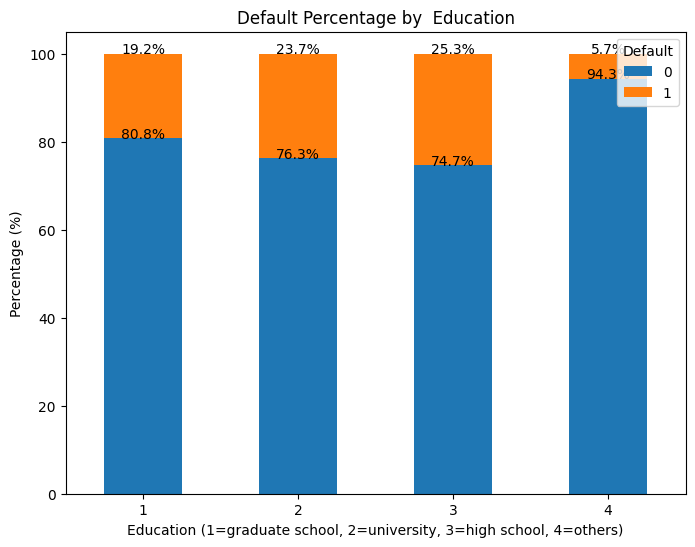

In [31]:
# Rename columns for clarity
df_percent2.columns = ['Non-Default', 'Default']

# Plotting the bar chart
ax = df_percent3.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Default Percentage by  Education')
plt.xlabel('Education (1=graduate school, 2=university, 3=high school, 4=others)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Default', loc='upper right')

# Adding data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height), ha='center')

plt.show()

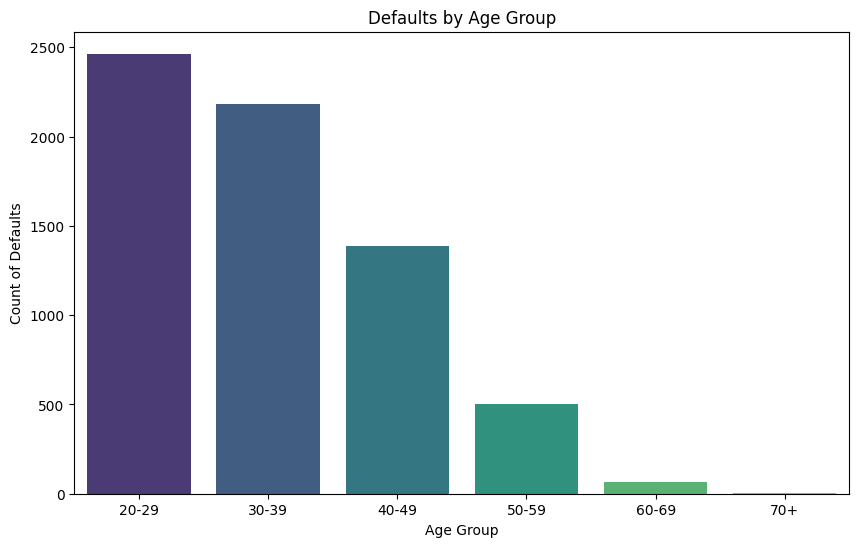

In [32]:
df_bins = df.copy()

# Bins and Labels
age_bins = [20, 30, 40, 50, 60, 70, 100]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# age group for bins
df_bins['AGE_GROUP'] = pd.cut(df_bins['AGE'], bins=age_bins, labels=age_labels)

default_yes = df_bins[df_bins['DEFAULT'] == 1]

# Grouping and Counting
defaults_per_age_group = default_yes.groupby('AGE_GROUP')['ID'].count()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=defaults_per_age_group.index, y=defaults_per_age_group.values, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count of Defaults')
plt.title('Defaults by Age Group')
plt.show()

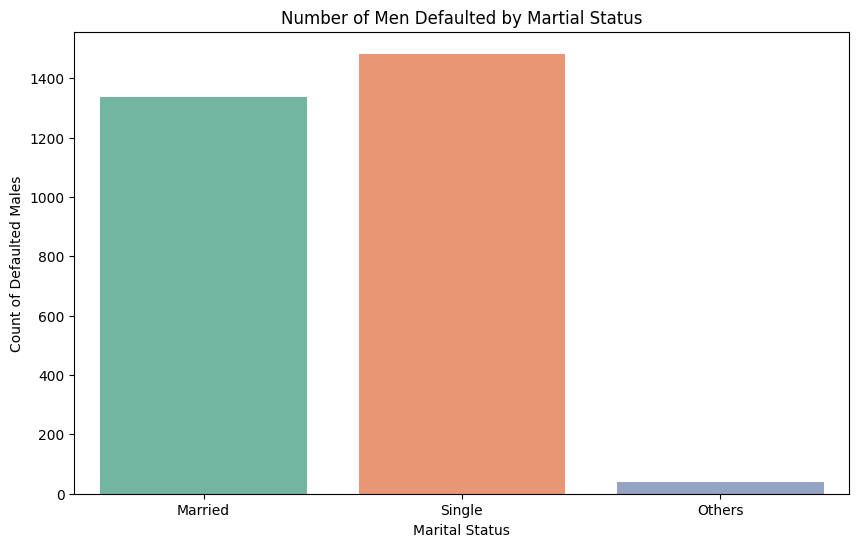

In [33]:
# Filter Men and Defaulted
men_defaulted = df[(df['SEX'] == 1) & (df['DEFAULT'] == 1)]

# Group and Count
men_defaults_by_marriage = men_defaulted.groupby('MARRIAGE')['ID'].count()


plt.figure(figsize=(10, 6))
sns.barplot(x=men_defaults_by_marriage.index, y=men_defaults_by_marriage.values, palette='Set2')
plt.xlabel('Marital Status')
plt.ylabel('Count of Defaulted Males')
plt.title('Number of Men Defaulted by Martial Status')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'])
plt.show()

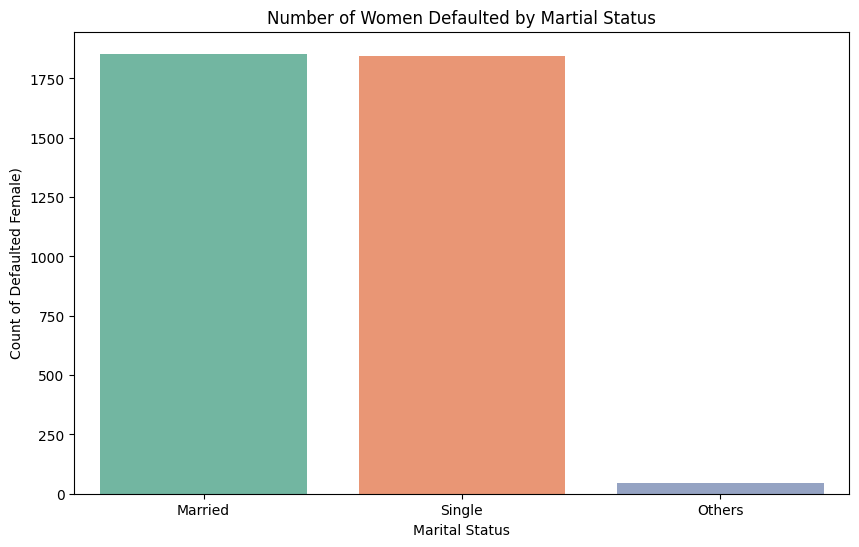

In [34]:
# Filter Women and Defaulted
women_defaulted = df[(df['SEX'] == 2) & (df['DEFAULT'] == 1)]

# Group and Count
women_defaults_by_marriage = women_defaulted.groupby('MARRIAGE')['ID'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=women_defaults_by_marriage.index, y=women_defaults_by_marriage.values, palette='Set2')
plt.xlabel('Marital Status')
plt.ylabel('Count of Defaulted Female)')
plt.title('Number of Women Defaulted by Martial Status')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'])
plt.show()

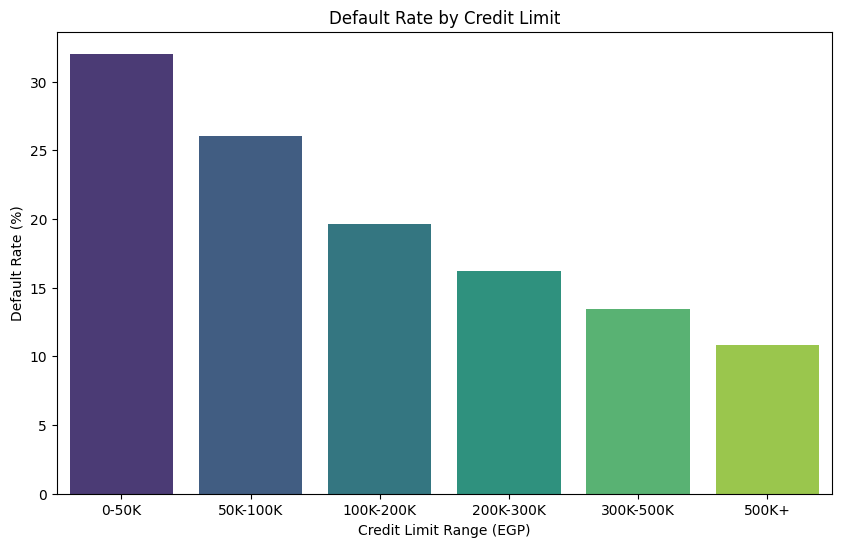

In [35]:
df_bin2 = df.copy()

# Define credit limit ranges
credit_limit_ranges = [(0, 50000), (50000, 100000), (100000, 200000), (200000, 300000), (300000, 500000), (500000, float('inf'))]
credit_limit_labels = ['0-50K', '50K-100K', '100K-200K', '200K-300K', '300K-500K', '500K+']

# range column
df_bin2['CREDIT_LIMIT_RANGE'] = pd.cut(df_bin2['LIMIT_BAL'], bins=[low for low, high in credit_limit_ranges] + [float('inf')], labels=credit_limit_labels)

# Group
default_rates_by_limit = df_bin2.groupby('CREDIT_LIMIT_RANGE')['DEFAULT'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates_by_limit.index, y=default_rates_by_limit.values, palette='viridis')
plt.xlabel('Credit Limit Range (EGP)')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Credit Limit')
plt.show()

# Preparing the Data for Modeling

In [36]:
# removing the ID as it is not needed for the model
df.drop('ID', axis="columns", inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [37]:
# removing the SEX as it is not needed for the model
df.drop('SEX', axis="columns", inplace=True)

#df.drop('BILL_AMT1', axis="columns", inplace=True)
df.drop('BILL_AMT2', axis="columns", inplace=True)
df.drop('BILL_AMT3', axis="columns", inplace=True)
df.drop('BILL_AMT4', axis="columns", inplace=True)
df.drop('BILL_AMT5', axis="columns", inplace=True)
df.drop('BILL_AMT6', axis="columns", inplace=True)

df.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,1,24,2,2,0,0,0,0,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,26,0,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,34,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,37,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,2,1,57,0,0,0,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [38]:
# spliting the data to train and test
from sklearn.model_selection import train_test_split

df2 = df.copy()


X = df.drop('DEFAULT', axis=1)   # independent variables
y = df['DEFAULT']                # Depandent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling

Accuracy: 0.78
Precision: 0.51
Recall: 0.46
F1 Score: 0.48


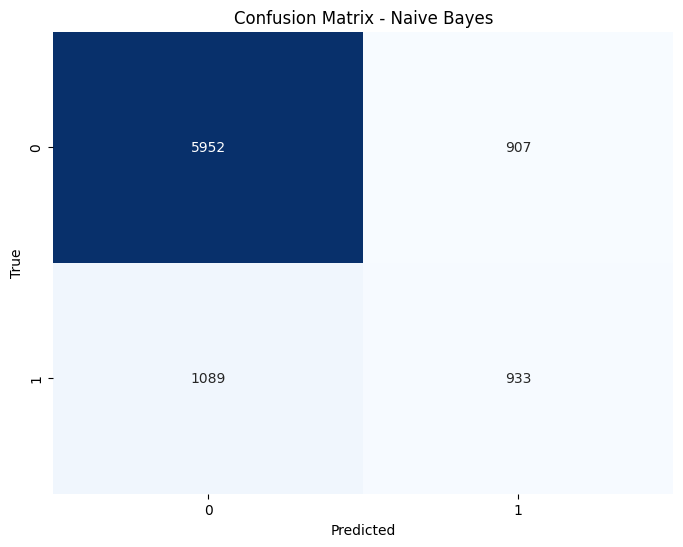

In [39]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# Naive Bayes
naive_bayes_model = BernoulliNB()

# Train the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_model.predict(X_test)

# Evaluating
accuracy = accuracy_score(y_test, y_pred) #How many of my answers are correct?
print(f"Accuracy: {accuracy:.2f}")

# precision, recall, and F1-score
precision = precision_score(y_test, y_pred) # how many of the positive predictions made by your model were actually correct
recall = recall_score(y_test, y_pred) # how many of the actual positives your model correctly predicted
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


# confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Accuracy: 0.81
Precision: 0.64
Recall: 0.37
F1 Score: 0.47


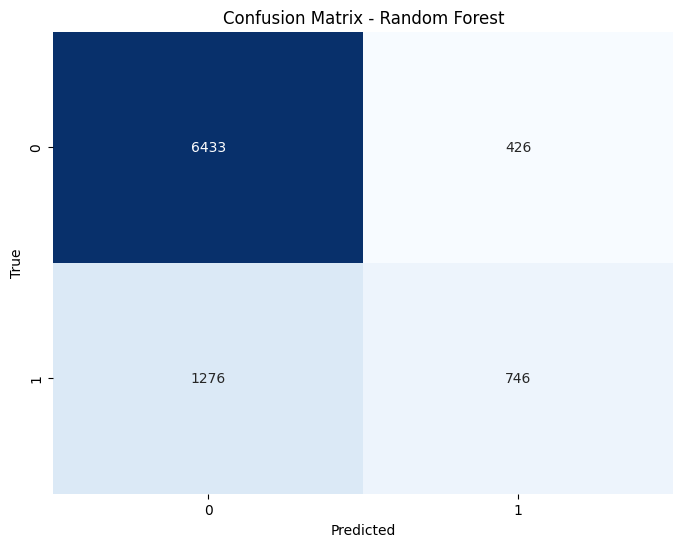

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = df2.drop('DEFAULT', axis=1)   # independent variables
y = df2['DEFAULT']                # Depandent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=400, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Oversampling


In [41]:
from sklearn.utils import resample

# Oversampling
df_over = df.copy()

# Separate majority and minority classes
majority_class = df_over[df_over['DEFAULT'] == 0]
minority_class = df_over[df_over['DEFAULT'] == 1]


minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

upsampled_data = pd.concat([majority_class, minority_upsampled])

# Check the balance of classes
print(upsampled_data['DEFAULT'].value_counts())

0    22996
1    22996
Name: DEFAULT, dtype: int64


In [42]:
X_over = upsampled_data.drop('DEFAULT', axis=1)
y_over = upsampled_data['DEFAULT']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

Accuracy: 0.68
Precision: 0.73
Recall: 0.57
F1 Score: 0.64


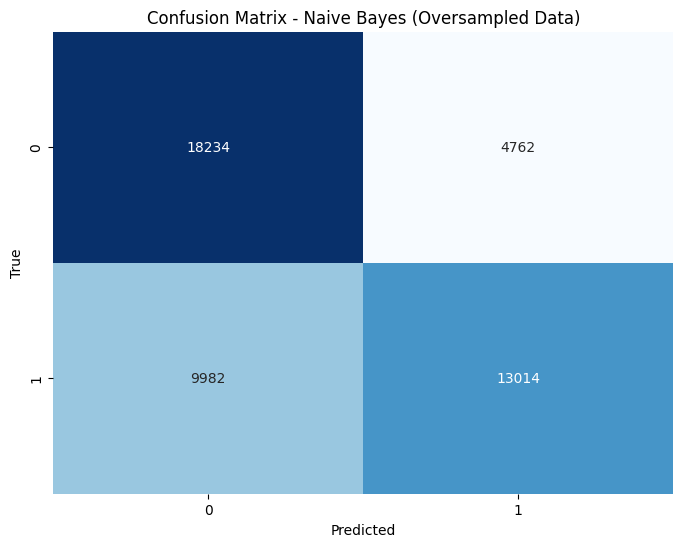

In [43]:
# Naive Bayes
naive_bayes_model = BernoulliNB()

# Train the model on the oversampled data
naive_bayes_model.fit(X_over, y_over)

# Make predictions on the oversampled data
y_pred = naive_bayes_model.predict(X_over)

# Evaluating
accuracy = accuracy_score(y_over, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# precision, recall, and F1-score
precision = precision_score(y_over, y_pred)
recall = recall_score(y_over, y_pred)
f1 = f1_score(y_over, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_over, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes (Oversampled Data)')
plt.show()

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


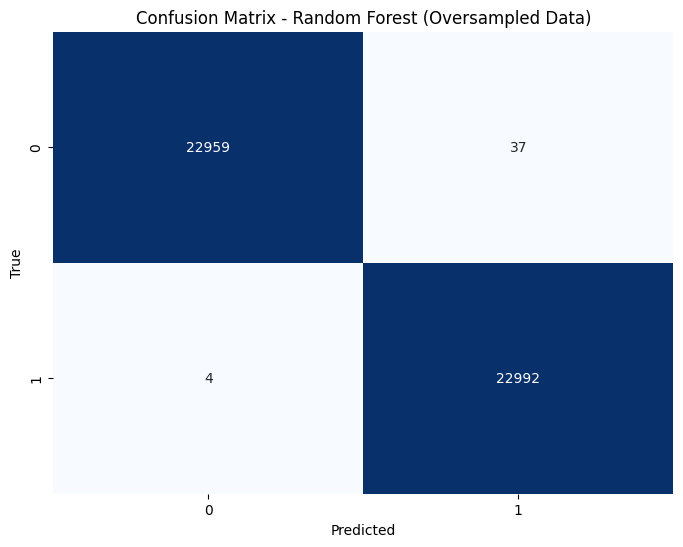

In [44]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
random_forest_model.fit(X_over, y_over)

# Predictions
y_pred_rf = random_forest_model.predict(X_over)

# Evaluating
accuracy_rf = accuracy_score(y_over, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# precision, recall, and F1-score for Random Forest
precision_rf = precision_score(y_over, y_pred_rf)
recall_rf = recall_score(y_over, y_pred_rf)
f1_rf = f1_score(y_over, y_pred_rf)

print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

# confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
conf_matrix_rf = confusion_matrix(y_over, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest (Oversampled Data)')
plt.show()